In [1]:
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,recall_score,precision_score,classification_report
from sklearn import metrics
import random
df = pd.read_csv("/Users/xiaodanlu/ANLY-580-Final-Project/Data/Combined.csv")
df.head()

,Date,Tweets_clean_more,polarity,subjectivity,sentiment,Label
0,2013-01-10,to super clear i dont wish could i mandat anyt...,0.216667,0.525000,positive,Decrease
1,2019-01-10,ye get regulatori pushback may avail region go...,0.123333,0.490556,positive,Increase
2,2020-01-10,dome barrel weld made bar pretti good bar need...,0.411111,0.570988,positive,Decrease
3,2012-01-11,the exec conf room tesla use call denali i dec...,0.600000,1.000000,positive,Increase
4,2016-01-11,sad hear david bowi die he amaz,-0.500000,1.000000,negative,Decrease


In [2]:
random.seed(10)
x=df["Tweets_clean_more"]
y=df["Label"]
# PARTITION THE DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
# PRINT THE TYPE AND SHAPE OF x_train, x_test, y_train, y_test
print(type(x_train),x_train.shape)
print(type(y_train),y_train.shape)
print(type(x_test),x_test.shape)
print(type(y_test),y_test.shape)
# COUNTVECTORIZER
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
x_train = vect.fit_transform(x_train)
x_test = vect.transform(x_test)

<class 'pandas.core.series.Series'> (1137,)
<class 'pandas.core.series.Series'> (1137,)
<class 'pandas.core.series.Series'> (285,)
<class 'pandas.core.series.Series'> (285,)


## LinearSVC

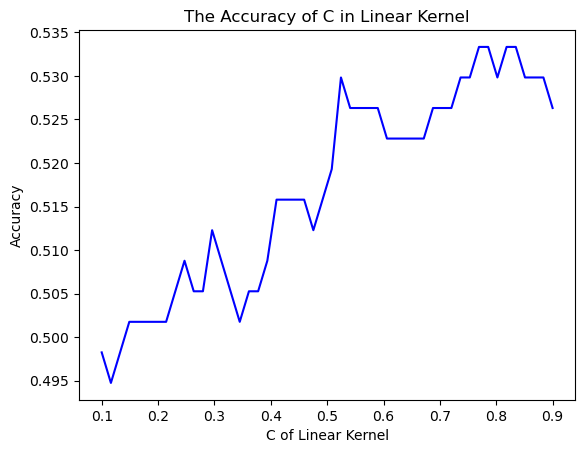

In [4]:
random.seed(10)
Accuracy=[]
for i in np.linspace(0.1,0.9):
    model=LinearSVC(C=i)
    model.fit(x_train,y_train)
    yp_test=model.predict(x_test)
    Accuracy.append(accuracy_score(yp_test,y_test))

plt.plot(np.linspace(0.1,0.9),Accuracy,'b')
plt.title('The Accuracy of C in Linear Kernel')
plt.xlabel('C of Linear Kernel')
plt.ylabel('Accuracy')
plt.grid(False)
plt.show()

In [6]:
# ROC Funtion
from sklearn.preprocessing import LabelBinarizer
def roc(y_test, y_pred, average="micro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average='micro')

------TEST------


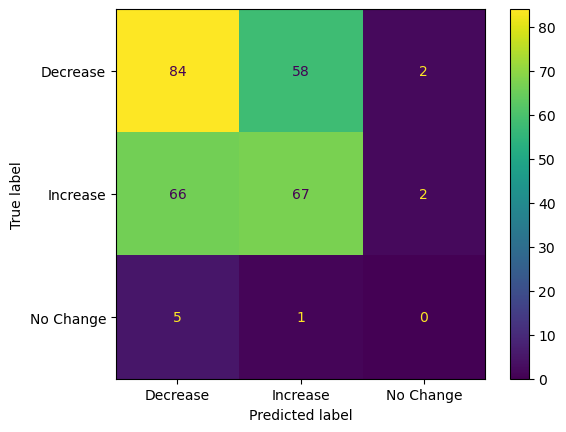

------TEST------
classification_report:
               precision    recall  f1-score   support

    Decrease       0.54      0.58      0.56       144
    Increase       0.53      0.50      0.51       135
   No Change       0.00      0.00      0.00         6

    accuracy                           0.53       285
   macro avg       0.36      0.36      0.36       285
weighted avg       0.53      0.53      0.53       285

Accurary: 0.5298245614035088
F1_score: 0.5298245614035088
AUC_ROC_Score: 0.6473684210526315


In [9]:
model = LinearSVC(C=0.85)
model = model.fit(x_train,y_train)
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

print("------TEST------")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,yp_test),display_labels=model.classes_)
disp.plot()
plt.grid(False)
plt.show()

print("------TEST------")
print("classification_report:\n", classification_report(y_test,yp_test))
print("Accurary:", accuracy_score(y_test,yp_test))
print("F1_score:", f1_score(y_test,yp_test, average='micro'))
print("AUC_ROC_Score:",roc(y_test,yp_test))


## SVC with Poly Kernel

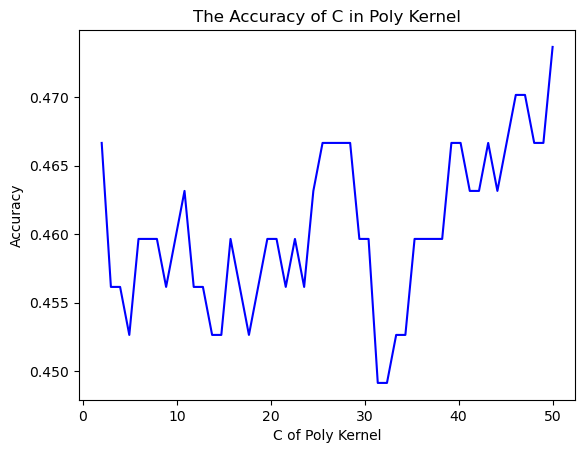

In [14]:
random.seed(10)
Accuracy2=[]
for i in np.linspace(2,50):
    model=SVC(C=i,kernel='poly')
    model.fit(x_train,y_train)
    yp_test=model.predict(x_test)
    Accuracy2.append(accuracy_score(yp_test,y_test))

plt.plot(np.linspace(2,50),Accuracy2,'b')
plt.title('The Accuracy of C in Poly Kernel')
plt.xlabel('C of Poly Kernel')
plt.ylabel('Accuracy')
plt.grid(False)
plt.show()

------TEST------


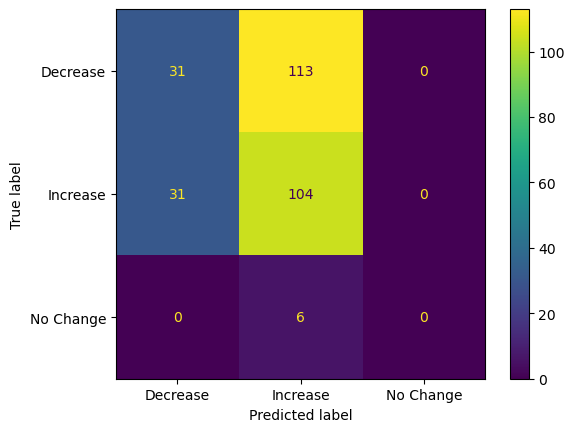

------TEST------
classification_report:
               precision    recall  f1-score   support

    Decrease       0.50      0.22      0.30       144
    Increase       0.47      0.77      0.58       135
   No Change       0.00      0.00      0.00         6

    accuracy                           0.47       285
   macro avg       0.32      0.33      0.29       285
weighted avg       0.47      0.47      0.43       285

Accurary: 0.47368421052631576
F1_score: 0.47368421052631576
AUC_ROC_Score: 0.6052631578947368


/Users/xiaodanlu/miniconda3/envs/anly580/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaodanlu/miniconda3/envs/anly580/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaodanlu/miniconda3/envs/anly580/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [10]:
model = SVC(C=50,kernel='poly')
model = model.fit(x_train,y_train)
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

print("------TEST------")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,yp_test),display_labels=model.classes_)
disp.plot()
plt.grid(False)
plt.show()

print("------TEST------")
print("classification_report:\n", classification_report(y_test,yp_test))
print("Accurary:", accuracy_score(y_test,yp_test))
print("F1_score:", f1_score(y_test,yp_test, average='micro'))
print("AUC_ROC_Score:",roc(y_test,yp_test))

## SVC with RBF Kernel

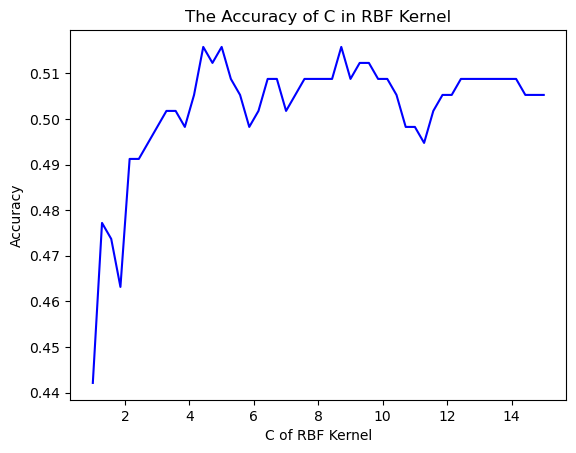

In [8]:
random.seed(10)
Accuracy3=[]
for i in np.linspace(1,15):
    model=SVC(C=i,kernel='rbf')
    model.fit(x_train,y_train)
    yp_test=model.predict(x_test)
    Accuracy3.append(accuracy_score(yp_test,y_test))

plt.plot(np.linspace(1,15),Accuracy3,'b')
plt.title('The Accuracy of C in RBF Kernel')
plt.xlabel('C of RBF Kernel')
plt.ylabel('Accuracy')
plt.grid(False)
plt.show()

------TEST------


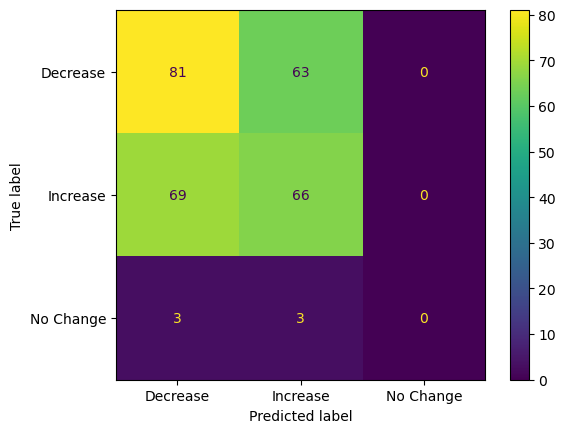

------TEST------
classification_report:
               precision    recall  f1-score   support

    Decrease       0.53      0.56      0.55       144
    Increase       0.50      0.49      0.49       135
   No Change       0.00      0.00      0.00         6

    accuracy                           0.52       285
   macro avg       0.34      0.35      0.35       285
weighted avg       0.50      0.52      0.51       285

Accurary: 0.5157894736842106
F1_score: 0.5157894736842106
AUC_ROC_Score: 0.6368421052631579


/Users/xiaodanlu/miniconda3/envs/anly580/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaodanlu/miniconda3/envs/anly580/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaodanlu/miniconda3/envs/anly580/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [11]:
model = SVC(C=4.5,kernel='rbf')
model = model.fit(x_train,y_train)
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)
print("------TEST------")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,yp_test),display_labels=model.classes_)
disp.plot()
plt.grid(False)
plt.show()

print("------TEST------")
print("classification_report:\n", classification_report(y_test,yp_test))
print("Accurary:", accuracy_score(y_test,yp_test))
print("F1_score:", f1_score(y_test,yp_test, average='micro'))
print("AUC_ROC_Score:",roc(y_test,yp_test))

## SVC with Sigmoid Kernel

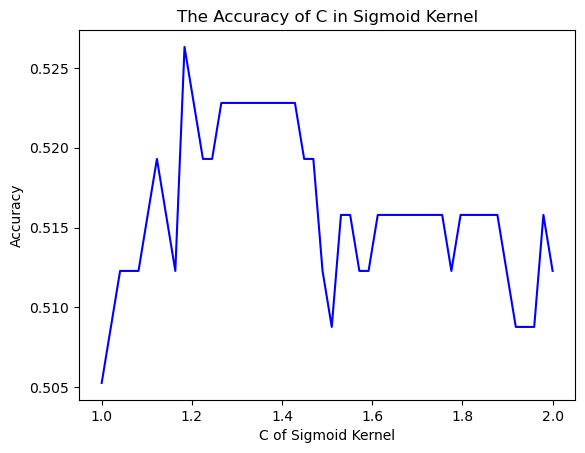

In [10]:
random.seed(10)
Accuracy4=[]
for i in np.linspace(1,2):
    model=SVC(C=i,kernel='sigmoid')
    model.fit(x_train,y_train)
    yp_test=model.predict(x_test)
    Accuracy4.append(accuracy_score(yp_test,y_test))

plt.plot(np.linspace(1,2),Accuracy4,'b')
plt.title('The Accuracy of C in Sigmoid Kernel')
plt.xlabel('C of Sigmoid Kernel')
plt.ylabel('Accuracy')
plt.grid(False)
plt.show()

------TEST------


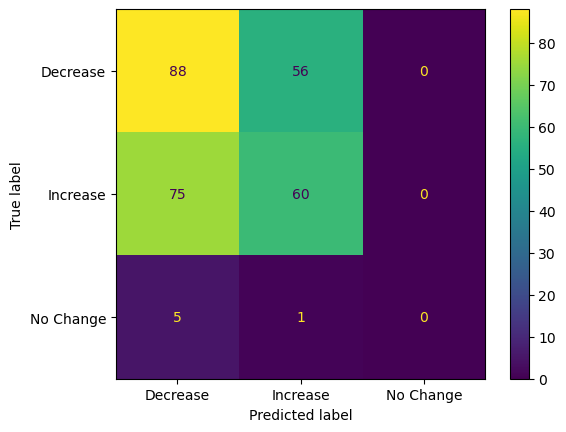

------TEST------
classification_report:
               precision    recall  f1-score   support

    Decrease       0.52      0.61      0.56       144
    Increase       0.51      0.44      0.48       135
   No Change       0.00      0.00      0.00         6

    accuracy                           0.52       285
   macro avg       0.35      0.35      0.35       285
weighted avg       0.51      0.52      0.51       285

Accurary: 0.519298245614035
F1_score: 0.519298245614035
AUC_ROC_Score: 0.6394736842105263


/Users/xiaodanlu/miniconda3/envs/anly580/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaodanlu/miniconda3/envs/anly580/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaodanlu/miniconda3/envs/anly580/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [12]:
model = SVC(C=1.22,kernel='sigmoid')
model = model.fit(x_train,y_train)
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)
# Calculate the confusion matrix and classification report for the train and test data. 

print("------TEST------")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,yp_test),display_labels=model.classes_)
disp.plot()
plt.grid(False)
plt.show()

print("------TEST------")
print("classification_report:\n", classification_report(y_test,yp_test))
print("Accurary:", accuracy_score(y_test,yp_test))
print("F1_score:", f1_score(y_test,yp_test, average='micro'))
print("AUC_ROC_Score:",roc(y_test,yp_test))